In [1]:
# Download AFAD dataset
import os
import tarfile

dataset_tar = 'afad.tar.xz'
dataset_folder = 'AFAD-Full'

if dataset_folder not in os.listdir():
    !git clone https://github.com/John-niu-07/tarball.git
    !cat tarball/AFAD-Full.tar.xz* > {dataset_tar}
    !rm -rfv tarball
    !tar -xf {dataset_tar}
    !rm {dataset_tar}


# Dataset labelling
from tqdm import tqdm

afad_filenames = []
afad_ages = []

for age in tqdm(os.listdir(dataset_folder)):
    if (age == 'AFAD-Full.txt') or (age == 'README.md'): # Ignore txt and README file
        continue
    
    sub_folders = os.listdir(
        os.path.join(
            dataset_folder, age
        )
    )
    
    for sf in sub_folders:
        cur_folder = os.path.join(
            dataset_folder, age, sf
        )
        for file in os.listdir(cur_folder):
            afad_filenames.append(
                os.path.join(
                    cur_folder, file
                )
            )
            afad_ages.append(int(age))


# Create pandas dataframe
import pandas as pd

afad_dataframe = pd.DataFrame(
    {
    'image_path': afad_filenames,
    'age': afad_ages
    }
)

def convert_label(age):
    return 1 if int(age) >= 18 else 0

afad_dataframe['label'] = afad_dataframe['age'].apply(convert_label)

print(afad_dataframe['label'].value_counts())
afad_dataframe



Cloning into 'tarball'...
remote: Enumerating objects: 55, done.
remote: Total 55 (delta 0), reused 0 (delta 0), pack-reused 55 (from 1)
Receiving objects: 100% (55/55), 1.43 GiB | 59.77 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Updating files: 100% (48/48), done.
removed 'tarball/AFAD-Full.tar.xzay'
removed 'tarball/AFAD-Full.tar.xzbr'
removed 'tarball/AFAD-Full.tar.xzap'
removed 'tarball/AFAD-Full.tar.xzat'
removed 'tarball/AFAD-Full.tar.xzbc'
removed 'tarball/AFAD-Full.tar.xzak'
removed 'tarball/AFAD-Full.tar.xzaw'
removed 'tarball/AFAD-Full.tar.xzau'
removed 'tarball/AFAD-Full.tar.xzbm'
removed 'tarball/AFAD-Full.tar.xzae'
removed 'tarball/AFAD-Full.tar.xzas'
removed 'tarball/AFAD-Full.tar.xzal'
removed 'tarball/AFAD-Full.tar.xzbo'
removed 'tarball/.git/hooks/pre-commit.sample'
removed 'tarball/.git/hooks/commit-msg.sample'
removed 'tarball/.git/hooks/prepare-commit-msg.sample'
removed 'tarball/.git/hooks/pre-merge-commit.sample'
removed 'tarball/.git/hooks/fsmonitor-watchma

100%|██████████| 63/63 [00:00<00:00, 230.60it/s]


label
1    159359
0      6156
Name: count, dtype: int64


,image_path,age,label
0,AFAD-Full/20/111/221898-1.jpg,20,1
1,AFAD-Full/20/111/257592-0.jpg,20,1
2,AFAD-Full/20/111/97346-0.jpg,20,1
3,AFAD-Full/20/111/35076-2.jpg,20,1
4,AFAD-Full/20/111/111125-0.jpg,20,1
...,...,...,...
165510,AFAD-Full/25/112/173981-1.jpg,25,1
165511,AFAD-Full/25/112/178447-0.jpg,25,1
165512,AFAD-Full/25/112/183035-0.jpg,25,1
165513,AFAD-Full/25/112/28699-0.jpg,25,1


In [2]:
# Download UTKFace dataset (add the dataset manually through kaggle)
utkface_folder = "/kaggle/input/utkface-new"
selected_subset = 'crop_part1'

utkface_path = os.path.join(utkface_folder, selected_subset)

utk_filenames = []
utk_ages = []
for utkfile in os.listdir(utkface_path):
    if not utkfile.endswith('.jpg'):
        continue
    
    file_info = utkfile[:-13] # Remove extension (.jpg.chip.jpg)
    file_info = file_info.split('_')
    race_id = file_info[2]
    if int(race_id) == 2: # race id for Asian
        utk_filenames.append(
            os.path.join(
                utkface_path, utkfile
            )            
        )
        utk_ages.append(
            int(file_info[0])
        )
        
utkface_dataframe = pd.DataFrame(
    {
    'image_path': utk_filenames,
    'age': utk_ages
    }
)

utkface_dataframe['label'] = utkface_dataframe['age'].apply(convert_label)

print(utkface_dataframe['label'].value_counts())
utkface_dataframe


label
0    978
1    575
Name: count, dtype: int64


,image_path,age,label
0,/kaggle/input/utkface-new/crop_part1/26_0_2_20...,26,1
1,/kaggle/input/utkface-new/crop_part1/26_1_2_20...,26,1
2,/kaggle/input/utkface-new/crop_part1/90_0_2_20...,90,1
3,/kaggle/input/utkface-new/crop_part1/1_0_2_201...,1,0
4,/kaggle/input/utkface-new/crop_part1/1_1_2_201...,1,0
...,...,...,...
1548,/kaggle/input/utkface-new/crop_part1/1_0_2_201...,1,0
1549,/kaggle/input/utkface-new/crop_part1/57_1_2_20...,57,1
1550,/kaggle/input/utkface-new/crop_part1/38_1_2_20...,38,1
1551,/kaggle/input/utkface-new/crop_part1/3_0_2_201...,3,0


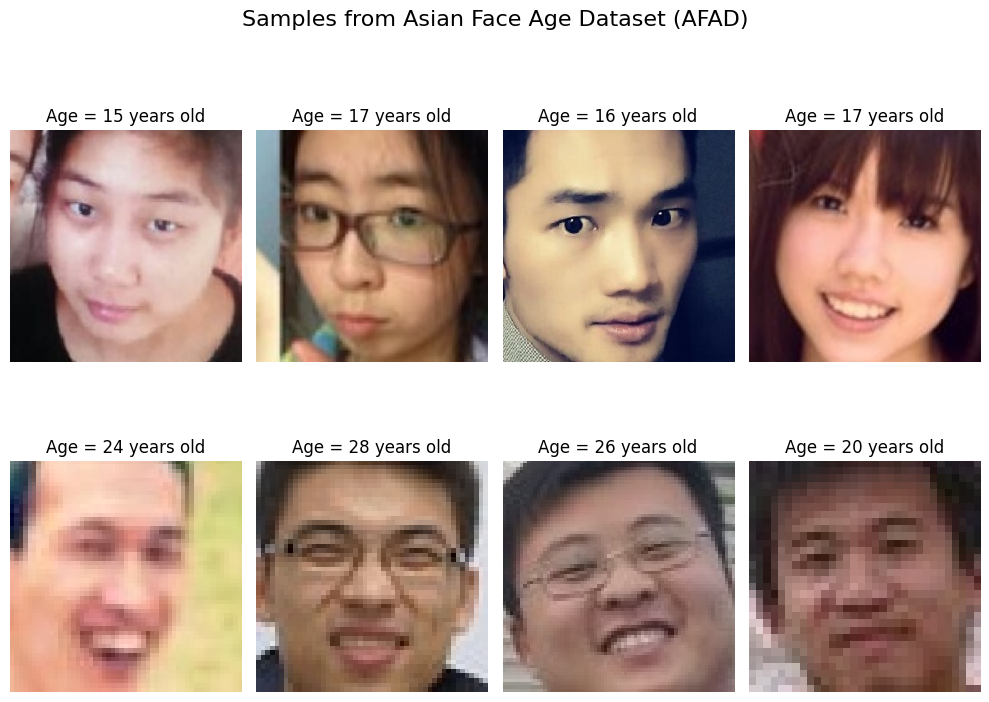

In [3]:
# Show image samples

import matplotlib.pyplot as plt
from PIL import Image

total_images_to_show = 4

# Display samples from AFAD dataset
afad_young_sample = afad_dataframe[afad_dataframe['age'] < 18].sample(n=total_images_to_show)
afad_old_sample = afad_dataframe[afad_dataframe['age'] > 18].sample(n=total_images_to_show)
afad_samples = pd.concat([afad_young_sample, afad_old_sample], ignore_index=True)

# Define grid size
rows, cols = 2, total_images_to_show

fig_afad, axes_afad = plt.subplots(rows, cols, figsize=(10, 8))
axes_afad = axes_afad.ravel()

for i, ax in enumerate(axes_afad):
    ax.imshow(Image.open(afad_samples.iloc[i].image_path))
    ax.set_title(f"Age = {afad_samples.iloc[i].age} years old")
    ax.axis("off")

fig_afad.suptitle('Samples from Asian Face Age Dataset (AFAD)', fontsize=16)
plt.tight_layout()
plt.show()

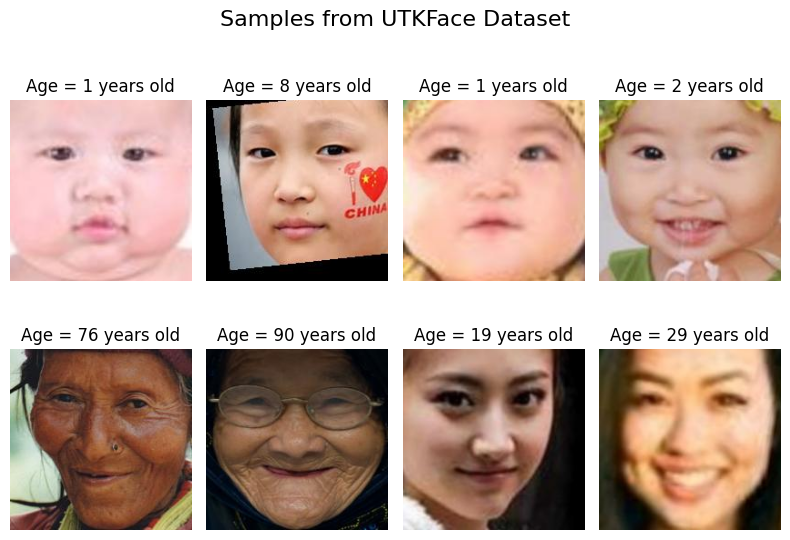

In [4]:
# Display samples from UTKFace dataset
utkface_young_sample = utkface_dataframe[utkface_dataframe['age'] < 18].sample(n=total_images_to_show)
utkface_old_sample = utkface_dataframe[utkface_dataframe['age'] > 18].sample(n=total_images_to_show)
utkface_samples = pd.concat([utkface_young_sample, utkface_old_sample], ignore_index=True)

# Define grid size
rows, cols = 2, total_images_to_show

fig_utkface, axes_utkface = plt.subplots(rows, cols, figsize=(8, 6))
axes_utkface = axes_utkface.ravel()

for i, ax in enumerate(axes_utkface):
    ax.imshow(Image.open(utkface_samples.iloc[i].image_path))
    ax.set_title(f"Age = {utkface_samples.iloc[i].age} years old")
    ax.axis("off")

fig_utkface.suptitle('Samples from UTKFace Dataset', fontsize=16)
plt.tight_layout()
plt.show()

Minimum age = 1,  Mean age = 25.66,  Maximum age = 101
Total samples equal to or over 18 years old = 159934
Total samples under 18 years old = 7134


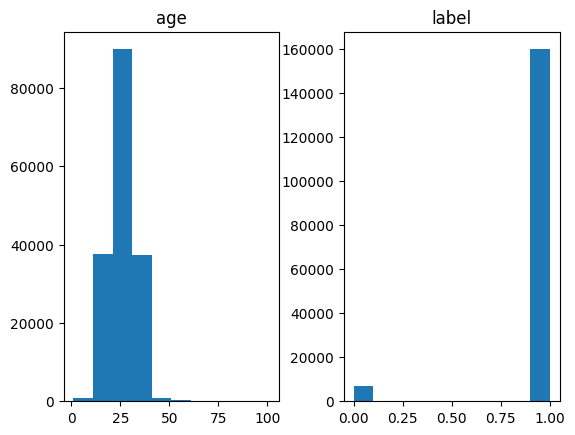

In [5]:
# Combine dataframes
combined_dataframe = pd.concat([afad_dataframe,utkface_dataframe], ignore_index=True)

# Show histogram
combined_dataframe.hist(grid=False)
print(f"Minimum age = {combined_dataframe['age'].min()},  Mean age = {combined_dataframe['age'].mean():.2f},  Maximum age = {combined_dataframe['age'].max()}")
print(f"Total samples equal to or over 18 years old = {combined_dataframe['label'].value_counts().get(1)}")
print(f"Total samples under 18 years old = {combined_dataframe['label'].value_counts().get(0)}")


Minimum age = 1,  Mean age = 20.37,  Maximum age = 90
Total samples equal to or over 18 years old = 7134
Total samples under 18 years old = 7134


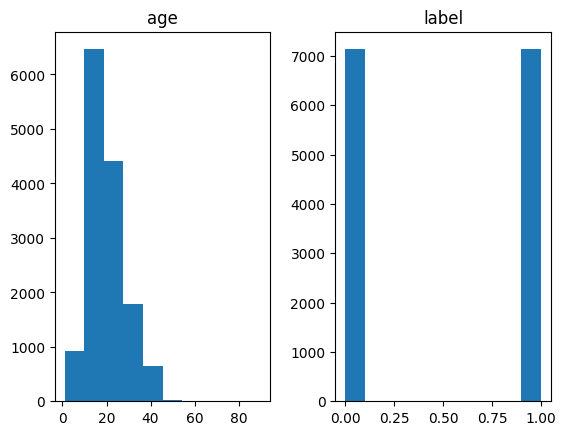

In [6]:
# Perform data resampling
target_sample = combined_dataframe['label'].value_counts().get(0) # resample based on minority class = label 0 or under 18

under18_samples = combined_dataframe[combined_dataframe['label'] == 0].sample(n=target_sample)
over18_samples = combined_dataframe[combined_dataframe['label'] == 1].sample(n=target_sample)

resampled_dataframe = pd.concat([under18_samples, over18_samples], ignore_index=True)
resampled_dataframe

# Show histogram
resampled_dataframe.hist(grid=False)
print(f"Minimum age = {resampled_dataframe['age'].min()},  Mean age = {resampled_dataframe['age'].mean():.2f},  Maximum age = {resampled_dataframe['age'].max()}")
print(f"Total samples equal to or over 18 years old = {resampled_dataframe['label'].value_counts().get(1)}")
print(f"Total samples under 18 years old = {resampled_dataframe['label'].value_counts().get(0)}")

In [7]:
# Create a PyTorch data loader and perform undersampling
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from torchvision import transforms

# Create a custom pytorch dataset
class ImageDataset(Dataset):
    def __init__(self, dataframe, image_size=380):
        """
        Args:
            dataframe (pd.DataFrame): Pandas DataFrame containing image paths and labels.
            img_dir (str): Directory where images are stored.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.dataframe = dataframe
        self.transform = transforms.Compose(
            [transforms.Resize((image_size, image_size)),
            transforms.ToTensor()]
        )  

    def __len__(self):
        """Return the total number of samples in the dataset."""
        return len(self.dataframe)

    def __getitem__(self, idx):
        """Fetch a sample (image and label) from the dataset."""
        img_name = self.dataframe.iloc[idx]['image_path']  # image path column
        label = self.dataframe.iloc[idx]['label']  # label column

        # Open the image
        image = Image.open(img_name).convert("RGB")  # Convert to RGB

        # Transform the image
        image = self.transform(image)

        return image, label


train_val_df, test_df = train_test_split(resampled_dataframe, test_size=0.1)
train_df, val_df = train_test_split(train_val_df, test_size=0.1)

train_dataset = ImageDataset(train_df)
val_dataset = ImageDataset(val_df)
test_dataset = ImageDataset(test_df)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=True, drop_last=True)

In [8]:
# Check total training and testing dataset
print(f"Total samples for model training = {len(train_dataset)}")
print(f"Total samples for model validation = {len(val_dataset)}")
print(f"Total samples for model evaluation = {len(test_dataset)}")

Total samples for model training = 11556
Total samples for model validation = 1285
Total samples for model evaluation = 1427


In [9]:
# Define model and hyperparameters
import torch.nn as nn
from torchvision import models
import torch.optim as optim


class EfficientNetBinaryClassifier(nn.Module):
    def __init__(self):
        super(EfficientNetBinaryClassifier, self).__init__()
        self.model = models.efficientnet_v2_l(pretrained=True)
        self.model.classifier[1] = nn.Linear(self.model.classifier[1].in_features, 1)  # Change output to 1 neuron (binary classification)

    def forward(self, x):
        return torch.sigmoid(self.model(x))

model = EfficientNetBinaryClassifier()


criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.AdamW(model.parameters(), lr=0.0001)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_V2_L_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_V2_L_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_v2_l-59c71312.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_v2_l-59c71312.pth
100%|██████████| 455M/455M [00:06<00:00, 69.4MB/s]


In [10]:
import torch
import time

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

num_epochs = 25
verbose_steps = 200
step = 0

start_time = time.time()
for epoch in range(num_epochs):
    # Training Phase
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    for images, labels in train_loader:
        optimizer.zero_grad()
        
        # Move data to the specified device
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs.squeeze(), labels.float())

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Print running loss every verbose_steps
        running_loss += loss.item()
        step += 1
        if (step + 1) % verbose_steps == 0:
            print(f"Current loss: {loss.item()}")
        
        # Calculate accuracy
        predicted = (outputs.squeeze() > 0.5).float()
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)
    
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_predictions / total_predictions * 100
    
    # Validation Phase
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    
    with torch.no_grad():  # No need to compute gradients during validation
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs.squeeze(), labels.float())
            val_loss += loss.item()

            # Calculate validation accuracy
            predicted = (outputs.squeeze() > 0.5).float()
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)
    
    val_epoch_loss = val_loss / len(val_loader)
    val_epoch_accuracy = val_correct / val_total * 100

    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy:.2f}%, "
          f"Val Loss: {val_epoch_loss:.4f}, Val Accuracy: {val_epoch_accuracy:.2f}%")

# End time
end_time = time.time()

# Calculate training time
elapsed_time = end_time - start_time
print(f"Training Time: {elapsed_time:.4f} seconds")

Current loss: 0.7269712090492249
Current loss: 0.5557859539985657
Current loss: 0.43886226415634155
Current loss: 0.7168647050857544
Current loss: 0.22121402621269226
Current loss: 0.48813050985336304
Current loss: 0.5748586654663086
Epoch [1/25], Train Loss: 0.5814, Train Accuracy: 69.68%, Val Loss: 0.5220, Val Accuracy: 74.45%
Current loss: 0.342069149017334
Current loss: 1.1404085159301758
Current loss: 0.6263865828514099
Current loss: 0.7074688673019409
Current loss: 0.7801178693771362
Current loss: 0.7177900075912476
Current loss: 0.4763737916946411
Epoch [2/25], Train Loss: 0.5004, Train Accuracy: 76.05%, Val Loss: 0.4820, Val Accuracy: 76.56%
Current loss: 0.62668776512146
Current loss: 0.48490723967552185
Current loss: 1.407226800918579
Current loss: 0.16292984783649445
Current loss: 0.7559391260147095
Current loss: 0.6808450222015381
Current loss: 0.41927239298820496
Epoch [3/25], Train Loss: 0.4089, Train Accuracy: 81.54%, Val Loss: 0.4890, Val Accuracy: 76.72%
Current loss: 